# Лабораторная работа №2. Методы оптимизации
*Кузнецов Максим, РК6-63б*

**Задание:**
Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.
Например, найти значения параметров, обеспечивающие минимальную разницу между числом "хищников" и числом "жертв" на всем интервале моделирования.

Система Лотки-Вольтерры является первоначальной и простейшей системой (усложненные системы будут рассмотрены ниже) для описания модели «хищник-жертва», то есть популяции хищников и популяции жертв, взаимодействующих в какой-то среде: жертвы едят растительность, хищники — жертв:


$\frac{dx}{dt} = (\alpha - \beta y)x$  
$\frac{dy}{dt} = (-\gamma + \delta x)y$
,где

x — численность жертв (травоядных);
y — численность хищников;
α — вероятность того, что травоядные размножатся;
β — вероятность того, что травоядное будет съедено хищником;
γ — вероятность того, что хищник умрет от голода;
δ — вероятность того, что хищнику хватит еды на дальнейшее размножение.
Из системы сразу следует, что если жертв нет (x = 0), то хищники будут вымирать экспоненциально с неким начальным коэффициентом (γ согласно уравнению).

   
Схожую ситуацию получаем при полном отсутствии хищников (y = 0):
   
Рост жертв получается экспоненциальным с некой заранее заданной константой (α). Стоит отметить, что в данной модели принимаются несколько допущений:

Количество пищи для травоядных не ограничено;
Ни жертвы, ни хищники не эмигрируют из среды;
Никакие другие животные не мигрируют в среду;
Данная модель не учитывает вымирание животных по причине старения и прочих внешних воздействий.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize

In [2]:
class Biome(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
    self._dt = dt
    self._n_iters = int(tmax / dt)
    # Intial state
    self.pred_init = pred_init
    self.prey_init = prey_init
    # Data arrays
    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):
    """
    Simulation settings:
        alpha - prey growth
        beta - prey mortality
        delta - predator growrh
        gamma - predator mortality
    """
    self.time = np.zeros(self._n_iters)
    self.prey = np.zeros(self._n_iters)
    self.pred = np.zeros(self._n_iters)
    self.prey[0] = self.prey_init
    self.pred[0] = self.pred_init
    # Lotka-Volterra equations
    for i in range(self._n_iters - 1):
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def plot(self):
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    plt.grid()
    plt.show()

Анализ устойчивости непосредственно связан с определением условий равновесия. В линейных системах существуют только одно состояние равновесия, поэтому зависимые переменные, характеризующие состояние системы, с течением времени приближаются либо к состоянию покоя, либо периодического изменения. В нелинейных же системах возможны ситуации, когда существуют несколько состояний равновесия.

alpha = 2.756
beta  = 2.454
gamma = 1.546
delta = 1.728


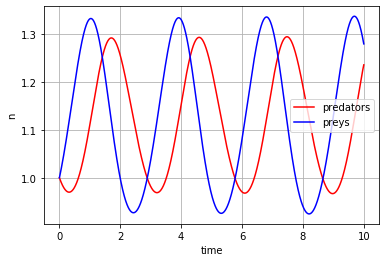

In [21]:
def maxdiff(param):
    maxd = 0
    maxprey = 0
    maxpred = 0
    biome = Biome(tmax = 10)
    biome.run(param[0], param[1], param[2], param[3])
    for i in range(0, biome._n_iters):
        if math.fabs(biome.prey[i] - biome.pred[i]) > maxd:
            maxd = math.fabs(biome.prey[i] - biome.pred[i])
        if maxprey < biome.prey[i]:
            maxprey = biome.prey[i]
        if maxpred < biome.pred[i]:
            maxpred = biome.pred[i]
    if maxd == 0:
        maxd = 10000
    del biome
    return maxd / ((maxprey + maxpred) / 2)

sln = minimize(maxdif,[3, 2, 2, 1])
print ('alpha =', sln.x[0].round(3))
print ('beta  =', sln.x[1].round(3))
print ('gamma =', sln.x[2].round(3))
print ('delta =', sln.x[3].round(3))
biome = Biome(tmax = 10)
biome.run(sln.x[0], sln.x[1], sln.x[2], sln.x[3])
biome.plot()
biome.plot_cycle()